Ciara Sikking 
Data Mining - Apr. 23, 2024

Feature Extraction

In [93]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
import skimage

# Import dog images 
dog_images = glob.glob('/Users/ciarasikking/Data_Mining-Assignment4/Cropped/*')


# Convert images to edge histograms 
def im2gray(img):
    gray = np.dot(img[...,0:3],[0.299,0.587,0.114])
    return gray 

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

directories = ['/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02086910-papillon',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02101556-clumber',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02113712-miniature_poodle',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02113978-Mexican_hairless']

i = 0
image_list = []
gray_image_list = []
edge_hist_list = []

# Separate classes 
dir_1 = directories[0]
dir_2 = directories[1]
dir_3 = directories[2]
dir_4 = directories[3]
class_1 = os.listdir(dir_1)
class_2 = os.listdir(dir_2)
class_3 = os.listdir(dir_3)
class_4 = os.listdir(dir_4)

edge_hist_pap = []
edge_hist_clum = []
edge_hist_minp = []
edge_hist_mexh = []

# Convert each image in each class to edge histograms 
for im in class_1:
    read_image = plt.imread(dir_1 + '/' + im)
    gray_image = im2gray(read_image)
    
    angle_sobel = angle(filters.sobel_h(gray_image),filters.sobel_v(gray_image))
    
    hist, bins = skimage.exposure.histogram(angle_sobel, nbins=36, normalize=False)
    edge_hist_pap.append(hist)
    
for im2 in class_2:
    read_image2 = plt.imread(dir_2 + '/' + im2)
    gray_image2 = im2gray(read_image2)
    
    angle_sobel2 = angle(filters.sobel_h(gray_image2),filters.sobel_v(gray_image2))
    
    hist2, bins2 = skimage.exposure.histogram(angle_sobel2, nbins=36, normalize=False)
    edge_hist_clum.append(hist2)
    
for im3 in class_3:
    read_image3 = plt.imread(dir_3 + '/' + im3)
    gray_image3 = im2gray(read_image3)
    
    angle_sobel3 = angle(filters.sobel_h(gray_image3),filters.sobel_v(gray_image3))
    
    hist3, bins3 = skimage.exposure.histogram(angle_sobel3, nbins=36, normalize=False)
    edge_hist_minp.append(hist3)
    
for im4 in class_4:
    read_image4 = plt.imread(dir_4 + '/' + im4)
    gray_image4 = im2gray(read_image4)
    
    angle_sobel4 = angle(filters.sobel_h(gray_image4),filters.sobel_v(gray_image4))
    
    hist4, bins4 = skimage.exposure.histogram(angle_sobel4, nbins=36, normalize=False)
    edge_hist_mexh.append(hist4)
    
# Normalize the edge histograms 
normalized_edge_hist_pap = []
normalized_edge_hist_clum = []
normalized_edge_hist_minp = []
normalized_edge_hist_mexh = []

for hist in edge_hist_pap:
    total_count = np.sum(hist)
    normalized_hist = hist / total_count
    normalized_edge_hist_pap.append(normalized_hist)
    
for hist in edge_hist_clum:
    total_count = np.sum(hist)
    normalized_hist = hist / total_count
    normalized_edge_hist_clum.append(normalized_hist)
    
for hist in edge_hist_minp:
    total_count = np.sum(hist)
    normalized_hist = hist / total_count
    normalized_edge_hist_minp.append(normalized_hist)

for hist in edge_hist_mexh:
    total_count = np.sum(hist)
    normalized_hist = hist / total_count
    normalized_edge_hist_mexh.append(normalized_hist)
    
labels_pap = [0] * len(edge_hist_pap)
labels_clum = [1] * len(edge_hist_clum)
labels_minp = [2] * len(edge_hist_minp)
labels_mexh = [3] * len(edge_hist_mexh)

true_labels = labels_pap + labels_clum + labels_minp + labels_mexh

In [94]:
all_edge = edge_hist_pap + edge_hist_clum + edge_hist_minp + edge_hist_mexh
all_norm_edge = normalized_edge_hist_pap + normalized_edge_hist_clum + normalized_edge_hist_minp + normalized_edge_hist_mexh

Dimension Reduction

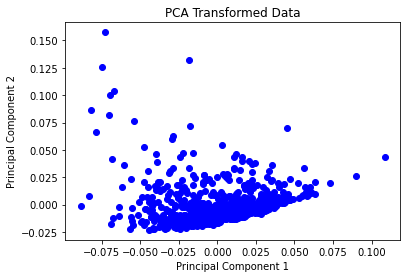

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(all_norm_edge)

all_norm_edge_pca = pca.transform(all_norm_edge)

plt.scatter(all_norm_edge_pca[:, 0], all_norm_edge_pca[:, 1], color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.show()

Clustering Algorithm

Kmeans with init = Random

In [96]:
from sklearn.cluster import KMeans

num_clusters = 4
kmeans_rand = KMeans(n_clusters= num_clusters, init = 'random')
kmeans_rand.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels_rand = kmeans_rand.labels_
print(cluster_labels_rand)

# Get cluster centers
cluster_centers_rand = kmeans_rand.cluster_centers_
print(cluster_centers_rand)

[2 2 1 1 2 0 1 1 2 2 0 0 0 2 2 2 0 2 1 2 0 2 2 2 2 0 2 1 1 1 2 1 2 2 0 1 1
 2 2 1 2 2 0 0 1 0 0 1 1 2 0 2 3 1 0 2 1 1 0 1 0 0 0 0 2 2 2 1 1 1 2 1 2 2
 2 2 2 2 1 1 2 2 2 2 1 2 0 2 1 1 0 1 1 2 2 0 0 0 2 1 0 2 1 2 2 1 1 0 1 0 1
 1 2 1 0 0 1 1 2 0 0 1 2 2 0 1 1 2 2 2 0 2 2 1 0 1 1 1 1 0 2 2 1 1 1 2 0 2
 1 0 2 0 1 2 2 2 0 2 1 0 2 1 0 1 2 2 1 0 2 2 2 0 0 2 2 1 1 2 3 2 1 0 2 0 2
 2 0 1 1 2 0 2 2 1 2 1 2 1 0 2 2 3 3 2 2 2 0 2 0 2 1 2 2 1 1 1 2 1 0 1 2 0
 0 2 1 0 2 0 1 2 1 1 2 2 1 2 0 1 1 2 2 0 2 1 1 1 2 1 2 2 2 0 1 1 1 1 1 1 0
 1 1 2 2 1 2 1 2 2 1 1 2 1 0 0 2 1 1 0 2 2 2 1 2 0 1 1 2 2 1 1 1 2 1 2 0 3
 1 1 2 2 0 1 0 2 2 1 0 1 2 0 1 2 2 2 0 2 1 1 2 2 1 1 1 2 1 1 2 1 1 2 1 1 1
 0 1 2 2 2 2 2 1 1 1 2 0 1 2 0 1 2 2 1 2 1 1 2 2 1 0 1 1 1 3 1 2 2 2 1 0 1
 2 2 1 1 2 1 0 0 2 2 0 2 1 2 0 2 2 2 2 2 1 1 1 3 0 2 0 0 2 0 2 2 0 0 2 2 0
 0 0 0 2 0 0 0 3 0 0 0 2 2 0 2 1 2 0 1 0 0 3 2 2 2 2 0 2 1 0 1 0 2 1 2 2 2
 0 2 0 3 2 1 2 1 0 2 0 0 2 2 3 0 1 3 0 1 2 1 1 2 0 0 2 0 2 2 0 0 1 1 0 2 1
 2 0 1 0 2 0 2 1 2 2 3 2 

/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K means with init = k-means++

In [97]:
num_clusters = 4
kmeans = KMeans(n_clusters= num_clusters, init = 'k-means++')
kmeans.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[0 0 2 2 0 1 2 2 0 0 1 1 1 0 0 0 1 0 2 0 1 0 0 0 0 1 0 2 2 2 0 2 0 0 1 2 2
 0 0 2 0 0 1 1 2 1 1 2 2 0 1 0 3 2 1 0 2 2 1 2 1 1 1 1 0 0 0 2 2 2 0 2 0 0
 0 0 0 0 2 2 0 0 0 0 2 0 1 0 2 2 1 2 2 0 0 1 1 1 0 2 1 0 2 0 0 2 2 1 2 1 2
 2 0 2 1 1 2 2 0 1 1 2 0 0 1 2 2 0 0 0 1 0 0 2 1 2 2 2 2 1 0 0 2 2 2 0 1 0
 2 1 0 1 2 0 0 0 1 0 2 1 0 2 1 2 0 0 2 1 0 0 0 1 1 0 0 2 2 0 3 0 2 1 0 1 0
 0 1 2 2 0 1 0 0 2 0 2 0 2 1 0 0 3 3 0 0 0 1 0 1 0 2 0 0 2 2 2 0 2 1 2 0 1
 1 0 2 1 0 1 2 0 2 2 0 0 2 0 1 2 2 0 0 1 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 1
 2 2 0 0 2 0 2 0 0 2 2 0 2 1 1 0 2 2 1 0 0 0 2 0 1 2 2 0 0 2 2 2 0 2 0 1 3
 2 2 0 0 1 2 1 0 0 2 1 2 0 1 2 0 0 0 1 0 2 2 0 0 2 2 2 0 2 2 0 2 2 0 2 2 2
 1 2 0 0 0 0 0 2 2 2 0 1 2 0 1 2 0 0 2 0 2 2 0 0 2 1 2 2 2 3 2 0 0 0 2 1 2
 0 0 2 2 0 2 1 1 0 0 1 0 2 0 1 0 0 0 0 0 2 2 2 3 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 1 0 1 1 1 3 1 1 1 0 0 1 0 2 0 1 2 1 1 1 0 0 0 0 1 0 2 1 2 1 0 2 0 0 0
 1 0 1 3 0 2 0 2 1 0 1 1 0 0 3 1 2 3 1 2 0 2 2 0 1 1 0 1 0 0 1 1 2 2 1 0 2
 0 1 2 1 0 1 0 2 0 0 2 0 

/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Bisecting k means

In [98]:
from sklearn.cluster import BisectingKMeans

num_clusters = 4

# Fit the model
bisect_means = BisectingKMeans(n_clusters= num_clusters, init = 'random').fit(all_norm_edge_pca)

print(bisect_means.labels_)
print(bisect_means.cluster_centers_)

[0 0 0 0 0 3 0 0 0 0 3 1 1 0 3 3 1 0 0 0 3 3 0 0 3 1 3 0 0 0 0 0 0 0 1 0 0
 3 3 0 0 3 3 3 0 3 1 0 0 0 3 0 1 0 3 0 0 0 3 0 3 1 1 3 0 0 3 0 0 0 0 0 3 0
 0 3 0 0 0 0 0 3 0 3 0 0 3 3 0 0 3 0 0 0 3 3 1 3 0 0 1 0 0 0 0 0 0 3 0 1 0
 0 0 0 3 3 0 0 0 1 3 0 0 0 3 0 0 0 0 0 1 0 0 0 1 0 0 0 0 3 0 3 0 0 0 0 3 0
 0 3 0 3 0 0 0 0 3 0 0 3 3 0 3 0 0 0 0 3 0 0 0 3 3 0 0 0 0 0 2 0 0 3 0 3 3
 0 1 0 0 0 3 3 0 0 3 0 3 0 1 0 3 1 1 0 0 0 1 0 1 0 0 3 3 0 0 0 0 0 3 0 0 3
 3 3 0 3 0 1 0 0 0 0 0 0 0 3 1 0 0 0 0 1 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 3
 0 0 0 0 0 3 0 0 0 0 0 0 0 1 1 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 3 1 2
 0 0 0 3 3 0 3 3 0 0 1 0 0 3 0 0 0 3 1 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 3 0 0 3 3 3 3 0 0 0 0 1 0 3 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 3 0 0 1 0
 0 0 0 0 0 0 3 1 0 0 3 0 0 0 1 3 3 0 3 3 0 0 0 1 1 0 3 3 3 1 0 3 3 3 3 0 1
 1 1 1 0 1 3 1 2 3 3 1 3 3 3 0 0 3 1 0 1 1 1 0 0 3 3 3 3 0 3 0 3 3 0 0 3 0
 3 3 1 2 0 0 3 0 3 3 3 3 0 3 2 1 0 2 1 0 0 0 0 0 3 1 0 1 3 0 3 3 0 0 3 0 0
 0 1 0 1 3 3 0 0 0 0 0 0 

Spectral clustering

In [99]:
from sklearn.cluster import SpectralClustering

num_clusters = 4
clustering = SpectralClustering(n_clusters= num_clusters).fit(all_norm_edge_pca)

labels = clustering.labels_
print(labels)

cluster_centers = np.zeros((num_clusters, all_norm_edge_pca.shape[1]))

for i in range(num_clusters):
    cluster_points = all_norm_edge_pca[cluster_labels == i]
    cluster_center = np.mean(cluster_points, axis=0)
    cluster_centers[i] = cluster_center
    
print(cluster_centers)

[3 0 3 3 3 0 3 3 0 3 0 0 0 0 0 0 0 3 3 3 0 0 3 3 0 0 0 3 3 3 0 3 0 3 0 3 3
 0 0 3 0 0 0 0 3 0 0 3 3 3 0 3 2 3 0 3 3 3 0 3 0 0 0 0 3 3 0 3 3 3 3 3 3 3
 3 0 0 3 3 3 3 0 0 0 3 0 0 0 3 3 0 3 3 3 0 0 0 0 3 3 0 0 3 3 3 3 3 0 3 0 3
 3 3 3 0 0 3 3 0 0 0 3 3 3 0 3 3 3 0 3 0 0 3 3 0 3 3 3 3 0 0 0 3 3 3 3 0 0
 3 0 3 0 3 0 3 3 0 3 3 0 0 3 0 3 3 3 3 0 3 3 3 0 0 3 3 3 3 3 2 0 3 0 3 0 0
 3 0 3 3 3 0 0 3 3 0 3 0 3 0 3 0 2 2 3 0 3 0 3 0 3 3 0 3 3 3 3 3 3 0 3 0 0
 0 0 3 0 3 0 3 3 3 3 3 3 3 0 0 3 3 3 3 0 3 3 3 3 0 3 1 3 0 0 3 3 3 3 3 3 0
 3 3 3 0 3 0 3 3 3 3 3 3 3 2 0 3 3 3 0 0 0 3 3 3 0 3 3 0 3 3 3 2 0 3 0 0 2
 3 3 3 3 0 3 0 3 3 3 0 3 3 0 2 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 0 3 3 0 0 0 0 3 3 3 0 0 3 3 0 3 3 3 3 0 3 3 0 3 3 2 3 3 3 2 3 3 0 3 3 0 3
 3 3 3 3 0 3 0 0 0 3 0 3 2 3 0 0 0 0 0 0 3 3 3 2 0 0 0 0 0 0 3 0 0 0 3 3 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 3 0 0 3 0 0 2 3 3 0 0 0 0 3 0 3 0 3 3 3 0 3
 0 0 0 2 3 3 0 3 0 0 0 0 3 0 2 0 3 2 0 3 0 3 3 3 0 0 3 0 3 0 0 0 3 3 0 0 3
 0 0 3 0 0 0 0 3 3 3 2 3 

DBSCAN

In [100]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(all_norm_edge_pca)

# Define parameter ranges
eps_range = [0.1, 0.5, 1.0, 1.5]  # Adjust based on the scale of your data
min_samples_range = [5, 10, 15, 20]

best_n_clusters = float('inf')
best_eps = None
best_min_samples = None

# Perform grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters == 4:  # Desired number of clusters
            print("Found parameters for 4 clusters: eps={}, min_samples={}".format(eps, min_samples))
            break  # Exit loop if desired number of clusters is found
        
        if abs(4 - n_clusters) < abs(4 - best_n_clusters):
            best_n_clusters = n_clusters
            best_eps = eps
            best_min_samples = min_samples

print("Best parameters: eps={}, min_samples={}".format(best_eps, best_min_samples))

Found parameters for 4 clusters: eps=0.1, min_samples=15
Best parameters: eps=0.1, min_samples=10


In [101]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(all_norm_edge_pca)

db = DBSCAN(eps=0.1, min_samples=15).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 592


To achieve 4 clusters I used eps = 0.1 and min_samples = 15

Agglomerative Clustering - Single Link

In [102]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='single')

agg_clustering.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels_single = agg_clustering.labels_

# Print the number of points in each cluster
for i in range(num_clusters):
    print("Number of points in cluster {}: {}".format(i, np.sum(cluster_labels_single == i)))

Number of points in cluster 0: 697
Number of points in cluster 1: 1
Number of points in cluster 2: 1
Number of points in cluster 3: 1


Agglomerative Clustering - Complete Link

In [103]:
num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')

agg_clustering.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels_complete = agg_clustering.labels_

# Print the number of points in each cluster
for i in range(num_clusters):
    print("Number of points in cluster {}: {}".format(i, np.sum(cluster_labels_complete == i)))

Number of points in cluster 0: 281
Number of points in cluster 1: 408
Number of points in cluster 2: 9
Number of points in cluster 3: 2


Agglomerative Clustering - Group Average

In [104]:
num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

agg_clustering.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels_avg = agg_clustering.labels_

# Print the number of points in each cluster
for i in range(num_clusters):
    print("Number of points in cluster {}: {}".format(i, np.sum(cluster_labels_avg == i)))

Number of points in cluster 0: 671
Number of points in cluster 1: 2
Number of points in cluster 2: 20
Number of points in cluster 3: 7


Agglomerative Clustering - Ward's Method

In [105]:
num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

agg_clustering.fit(all_norm_edge_pca)

# Get cluster labels
cluster_labels_wards = agg_clustering.labels_

# Print the number of points in each cluster
for i in range(num_clusters):
    print("Number of points in cluster {}: {}".format(i, np.sum(cluster_labels_wards == i)))

Number of points in cluster 0: 246
Number of points in cluster 1: 238
Number of points in cluster 2: 9
Number of points in cluster 3: 207


Clustering Evaluations

Fowlkes-Mallows index 

In [106]:
from sklearn.metrics import fowlkes_mallows_score

# Calculate the Fowlkes-Mallows index for single link agglomerative clustering 
fowlkes_mallows_index_single = fowlkes_mallows_score(true_labels, cluster_labels_single)

# Print the Fowlkes-Mallows index
print("Fowlkes-Mallows index Single Link:", fowlkes_mallows_index_single)



# Calculate the Fowlkes-Mallows index for complete link agglomerative clustering 
fowlkes_mallows_index_complete = fowlkes_mallows_score(true_labels, cluster_labels_complete)

# Print the Fowlkes-Mallows index
print("Fowlkes-Mallows index Complete Link:", fowlkes_mallows_index_complete)



# Calculate the Fowlkes-Mallows index for average link agglomerative clustering 
fowlkes_mallows_index_avg = fowlkes_mallows_score(true_labels, cluster_labels_avg)

# Print the Fowlkes-Mallows index
print("Fowlkes-Mallows index Average Link:", fowlkes_mallows_index_avg)



# Calculate the Fowlkes-Mallows index for single link agglomerative clustering 
fowlkes_mallows_index_wards = fowlkes_mallows_score(true_labels, cluster_labels_wards)

# Print the Fowlkes-Mallows index
print("Fowlkes-Mallows index Wards Link:", fowlkes_mallows_index_wards)


Fowlkes-Mallows index Single Link: 0.5005019443740246
Fowlkes-Mallows index Complete Link: 0.3786433253010729
Fowlkes-Mallows index Average Link: 0.4835254758944769
Fowlkes-Mallows index Wards Link: 0.3080357679184214


Silhouette Coefficient 

In [107]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for single link agglomerative clustering 
silhouette_coefficient_single = silhouette_score(all_norm_edge_pca, cluster_labels_single)

# Print the silhouette score
print("Silhouette coefficient Single Link:", silhouette_coefficient_single)


# Calculate the silhouette score for complete link agglomerative clustering 
silhouette_coefficient_complete = silhouette_score(all_norm_edge_pca, cluster_labels_complete)

# Print the silhouette score
print("Silhouette coefficient Complete Link:", silhouette_coefficient_complete)


# Calculate the silhouette score for average link agglomerative clustering 
silhouette_coefficient_avg = silhouette_score(all_norm_edge_pca, cluster_labels_avg)

# Print the silhouette score
print("Silhouette coefficient Average Link:", silhouette_coefficient_avg)


# Calculate the silhouette score for wards link agglomerative clustering 
silhouette_coefficient_wards = silhouette_score(all_norm_edge_pca, cluster_labels_wards)

# Print the silhouette score
print("Silhouette coefficient Wards Link:", silhouette_coefficient_wards)

Silhouette coefficient Single Link: 0.5355923755981296
Silhouette coefficient Complete Link: 0.43917422942351925
Silhouette coefficient Average Link: 0.46717707700080335
Silhouette coefficient Wards Link: 0.3152322283874674


Ranking of methods based on Fowlkes-Mallows Index: 1. Single 2. Average 3. Complete 4. Wards

Ranking of methods based on Silhouette Coefficient: 1. Single 2. Average 3. Complete 4. Wards